In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

In [9]:
inspector = inspect(engine)

for table_name in inspector.get_table_names():
    print(f"Table name: {table_name}")
    
    for column in inspector.get_columns(table_name):
        print("Column: %s %s" % (column['name'], column['type']))
    
    print()

Table name: measurement
Column: id INTEGER
Column: station TEXT
Column: date TEXT
Column: prcp FLOAT
Column: tobs FLOAT

Table name: station
Column: id INTEGER
Column: station TEXT
Column: name TEXT
Column: latitude FLOAT
Column: longitude FLOAT
Column: elevation FLOAT



# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = pd.read_sql("SELECT date FROM Measurement ORDER BY date DESC", conn).head(1)
most_recent_date

,date
0,2017-08-23


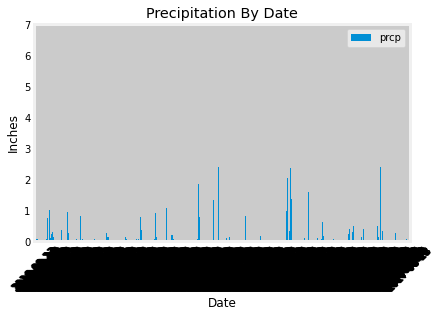

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_12_months = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23'", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df = last_12_months_df.set_index('date')

# Sort the dataframe by date
last_12_months_df = last_12_months_df.sort_values('date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_12_months_df.plot.bar()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation By Date')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [17]:
# Close Session
#session.close()